# Automobile Analytics 

## Scenario

You are a Data Analyst in an Automotive firm in Calgary, AB, Canada. Your Product Manager just approached you and want to know how efficient the makes of vehicles the company sells have performed over a period of time. You were given access to the automobile dataset consiting of key variables needed to answer the questions being asked by your Product Manager. 

## Business Tasks

Your tasks are:

1. To provide insights into the performances of the makes of the vehicles the company sells

2. Suggest the actions responsible for the performance of these makes of vehicles

3. Provide the 3 highest perfoming makes across the business

4. Find out the relationships among the fuel-types, engine-location, engine-size, compression-ratio and prices the company sells the makes of vehicles available for sale.

5. Provide any further interesting insights and recomendations that can assist the company to increase business performance in the coming months and years.

**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
auto = pd.read_csv('C:\\Users\\user\\Downloads\\Datasets\\automobile.csv')

**Get familiar with the dataset**

In [3]:
# First 5 rows in the dataset
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [4]:
# Last 5 rows in the dataset
auto.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [5]:
# More information about the dataset (data types of the variables)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [6]:
# No of rows and columns
auto.shape

(201, 26)

In [7]:
# Data types
auto.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [8]:
# No of null values
auto.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Duplicated data
auto.duplicated().sum()

0

**Clean your data to prepare it for analysis**

In [10]:
# Drop the columns not relevant to our analysis
auto = auto.drop(['normalized-losses', 'curb-weight'], axis = 1) 

In [11]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [12]:
auto.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [13]:
auto.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Since null values are negligible in the remaining dataset, we can drop null values and this shouldn't affect the integrity and quality of the dataset

In [14]:
# Drop the null values
auto = auto.dropna()

In [15]:
auto.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
auto.duplicated().sum()

0

In [17]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


Generate a descriptive statistics of the auto dataset

In [18]:
# Descriptive statistics 
auto.describe()

,symboling,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,6.152409,12.478593,2.137795,2.394770,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,86.600000,141.100000,60.300000,47.800000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  engine-type        193 non-null    object 
 13  num-of-cylinders   193 non-null    object 
 14  engine-size        193 non-null    int64  
 15  fuel-system        193 non-null    object 
 16  bore               193 non

The data is now clean

### Analyze and Visualize the data

<AxesSubplot:title={'center':'Comparison of the make, fuel type and price of cars'}, xlabel='price', ylabel='make'>

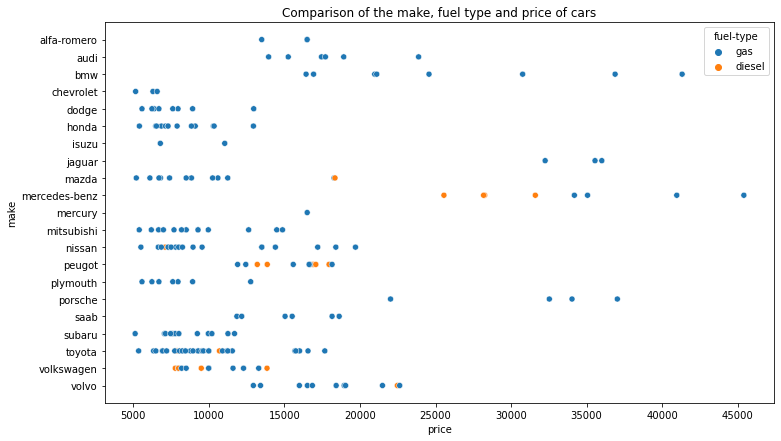

In [20]:
# Find the relationships between the make, fuel-type and price
plt.figure(figsize=(12,7))
plt.title('Comparison of the make, fuel type and price of cars')
sns.scatterplot(x='price', y='make', data = auto, hue = 'fuel-type')


* Generally, across all the makes, cars that use gas as fuel cost more than those that use diesel, apart from the exception of mazda and volkswagen.

* Accross all the makes of cars, mercedes-benz that use gas is the most expensive with more than 45,000, closely followed by bmw at a little above 40,000 and followed by porsche at around 37,000.

What is the relationship between makes of cars and their prices?

<AxesSubplot:title={'center':'Relationship between make and price'}, xlabel='make', ylabel='price'>

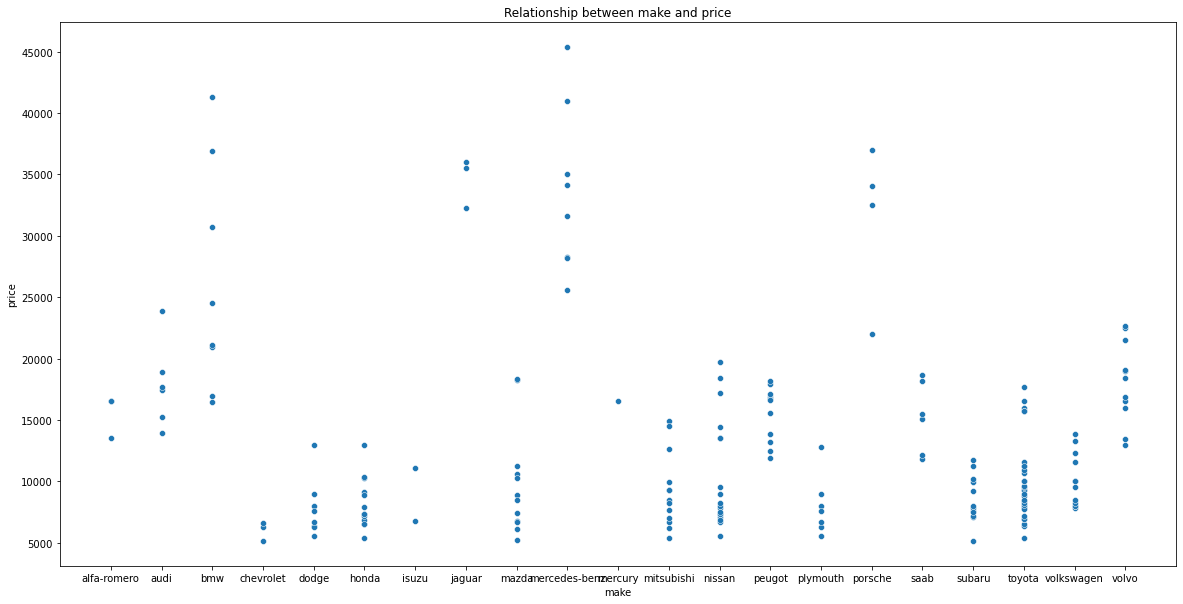

In [21]:
plt.figure(figsize=(20,10))
plt.title("Relationship between make and price")
sns.scatterplot(x='make', y='price', data=auto)

There's no significant relationship between make and price, other than the plot shows that the 3 highest expensive cars by price are: 'mercedes-benz', followed by 'bmw' and then 'porsche'

<AxesSubplot:title={'center':'Comparison of the make, fuel system and price of cars'}, xlabel='price', ylabel='make'>

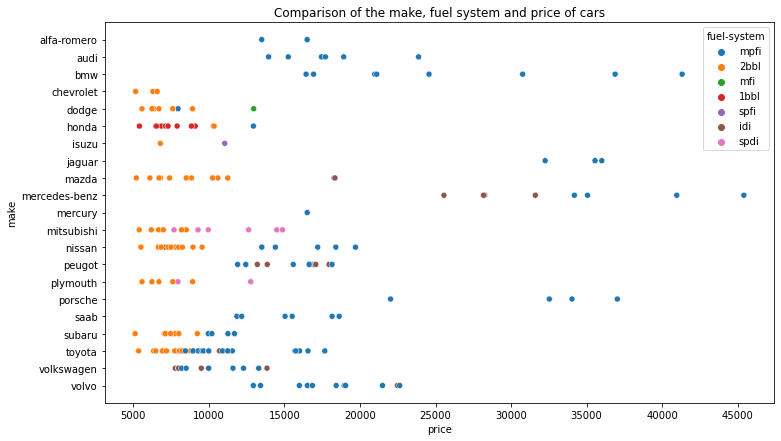

In [22]:
# Find the relationships between the make, fuel-system and price
plt.figure(figsize=(12,7))
plt.title('Comparison of the make, fuel system and price of cars')
sns.scatterplot(x='price', y='make', data = auto, hue = 'fuel-system')

Provide a lineplot to show the relationship between the fuel-system and price

<AxesSubplot:title={'center':'Price vs Fuel System'}, xlabel='price', ylabel='fuel-system'>

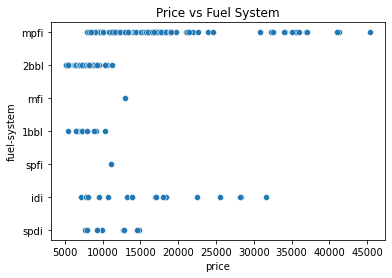

In [23]:
plt.title("Price vs Fuel System")
sns.scatterplot(x='price', y='fuel-system', data=auto)

Across all the makes of vehicles for sale at the company, cars with mpfi fuel-system cost more than those with other types of fuel-system. It can be inferred that 'mpfi' fuel-system is of higher quality than the other types and adds highest value to cars more and makes their prices more competitive in the market

Provide a  to show the relationship among the fuel-type, fuel-system and horsepower

<AxesSubplot:title={'center':' Fuel Type vs Fuel System vs Horsepower'}, xlabel='horsepower', ylabel='fuel-system'>

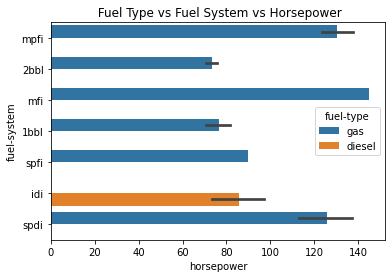

In [24]:
plt.title(" Fuel Type vs Fuel System vs Horsepower")
sns.barplot(x='horsepower', y='fuel-system', data=auto, hue='fuel-type')

It shows that cars that run on gas have higher horsepower than on diesel across the different types of fuel-system, apart from 'idi' fuel-system.

Is there any relationship between car's horsepower, drive wheels and their prices?

<AxesSubplot:title={'center':'Horsepower vs Drive Wheels vs Price'}, xlabel='price', ylabel='horsepower'>

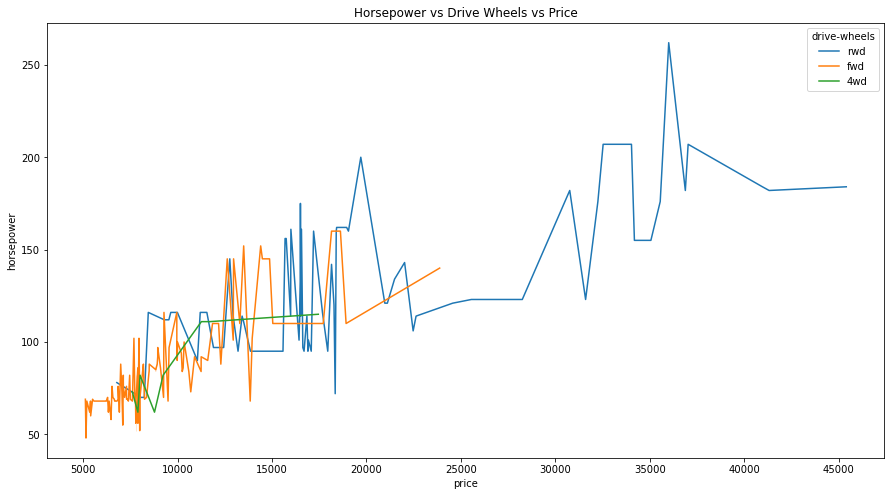

In [25]:
plt.figure(figsize=(15,8))
plt.title("Horsepower vs Drive Wheels vs Price")
sns.lineplot(x='price', y='horsepower', data=auto, hue='drive-wheels')

There's a direct relationship between horsepower and prices with the two variables increasing from left to right and this is the same among the different types of drive-wheels (rwd, fwd, and 4wd)

Create a new column with title 'body-area' which is the product of 'length' and 'width' and what is the relationship between 'body-area' and 'price'?

In [26]:
auto['body-area'] = auto['length'] * auto['width']

In [27]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-area
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,10820.08
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,10820.08
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,11213.60
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,11690.92
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,11726.24


In [28]:
auto['body-area'].describe()

count      193.000000
mean     11509.780725
std       1169.712744
min       8508.330000
25%      10709.720000
50%      11346.900000
75%      12408.900000
max      14920.770000
Name: body-area, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot for Body-Area of Auto Dataset')

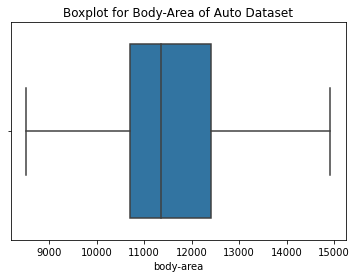

In [29]:
sns.boxplot(auto['body-area'])
plt.title("Boxplot for Body-Area of Auto Dataset")

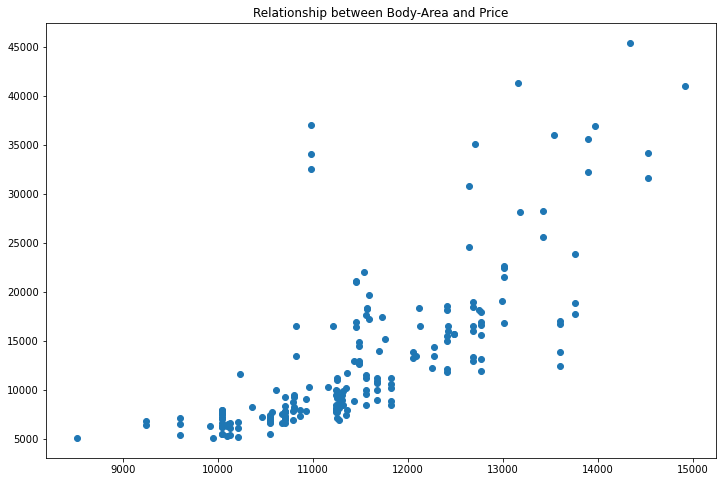

In [30]:
# Find the relationship between body-area and price
plt.figure(figsize=(12,8))
plt.title("Relationship between Body-Area and Price")
plt.scatter(auto['body-area'], auto['price'])

There seems to be a positive correlation between the body-area and price but, correlation does not mean causation.

 Is there any relationship between the new variable 'body-area' and the existing variable 'body-style'?

<BarContainer object of 193 artists>

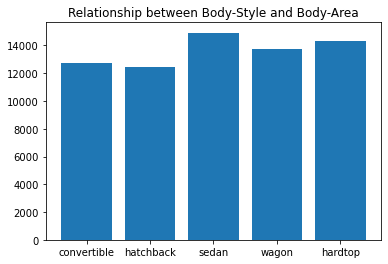

In [31]:
plt.title("Relationship between Body-Style and Body-Area")
plt.bar(auto['body-style'], auto['body-area'])

<AxesSubplot:title={'center':'Relationship between Body-Area and Price'}, xlabel='price', ylabel='body-area'>

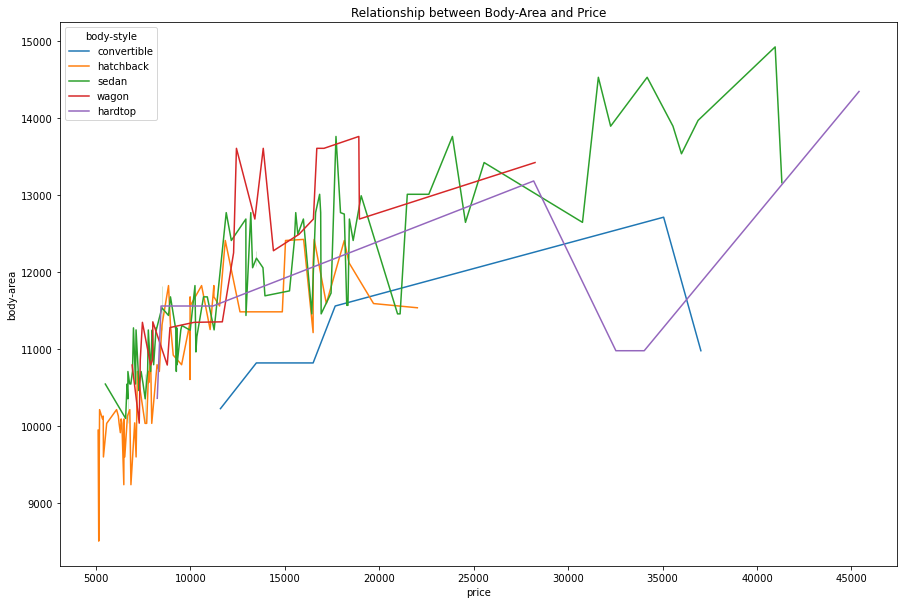

In [32]:
plt.figure(figsize=(15,10))
plt.title("Relationship between Body-Area and Price")
sns.lineplot(x='price', y='body-area', data=auto, hue='body-style')

There is no direct relationship between body-area and price of the car as 'sedan' with the biggest body-area doesn't have the highest price figure. This is obvious from the irregular line patterns as seen on the plot.

Provide a bargraph to show the relationship between the engine location and engine size

<BarContainer object of 193 artists>

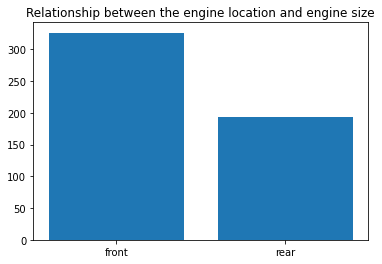

In [33]:
# What can we discover in the relationship between the engine-location, and engine-size
plt.title("Relationship between the engine location and engine size")
plt.bar(auto['engine-location'], auto['engine-size'])

Across all the makes of cars, cars that the engines are located at the front have bigger engine sizes and are more than cars that their engines are located at the rear. 

<AxesSubplot:title={'center':'Relationship between engine location and compression ratio'}, xlabel='engine-location', ylabel='compression-ratio'>

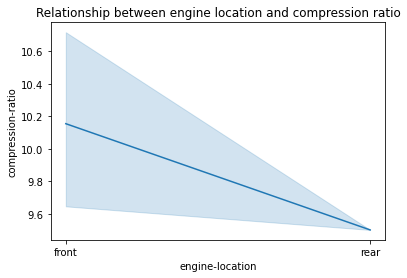

In [34]:
# What can we discover in the relationship between the engine-location, and compression-ratio
plt.title("Relationship between engine location and compression ratio")
sns.lineplot(x='engine-location', y='compression-ratio', data = auto)

Across all the makes of the cars, there's a negative correlation between the compression ratio and engine location (from front to rear). The compression ratio is high when the engine location is in front and it is low when the engine location is at the rear. **Please note that correllation does not mean causation.**

<AxesSubplot:title={'center':'Relationship between number of cylinders and compression ratio'}, xlabel='num-of-cylinders', ylabel='compression-ratio'>

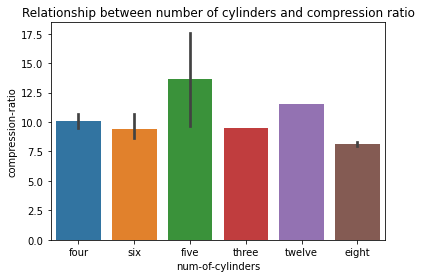

In [35]:
# Relationship between the num-of-cylinders of the mekes of cars and the compression-ratio
plt.title("Relationship between number of cylinders and compression ratio")
sns.barplot(x='num-of-cylinders', y='compression-ratio', data = auto)

It seems there's no positive correlation between the number of cylinders in the makes of the cars and the level of compression ratio. Cars with 5 cylinders have the highest level of compression ratio of about 13, followed by those with 10 cylinders with compression ratio of about 11.6, and with the highest third with cars that have four cylinders with compression ratio of 10.0

In [36]:
# How many makes of cars do we have in the warehouse.
# Do a unique counts of the 'make' of the cars
auto["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

There are a total of 22 different makes of vehicles in the warehouse during the period of analysis.

**Visualize the inventory of the stock of makes of cars at the warehouse**

In [37]:
# Take an inventory of the stock of makes of cars at the warehouse during th time of this analysis
# To do this, we will do a value count of the 'make' of cars in stock
auto.make.value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


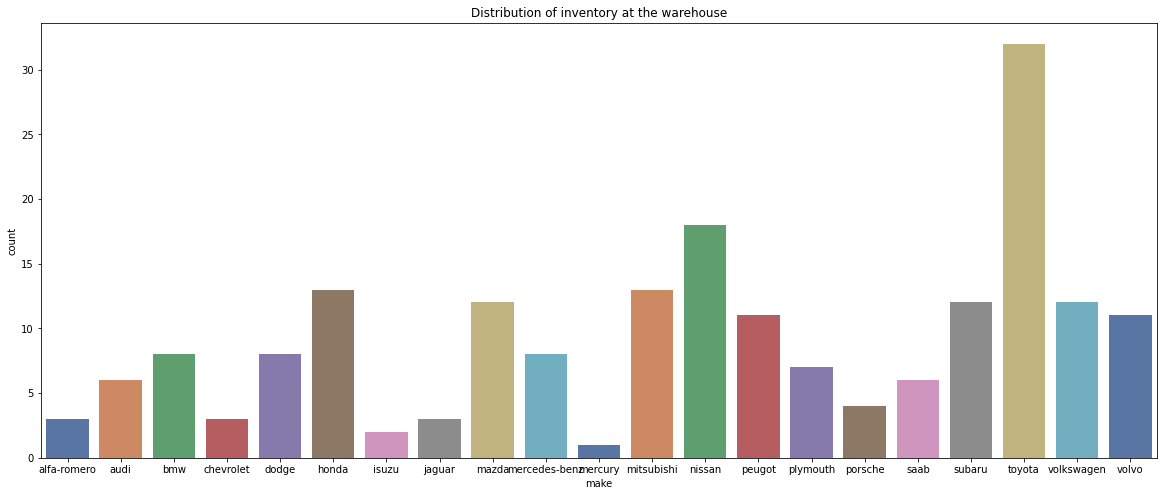

In [38]:
plt.figure(figsize=(20,8))
plt.title("Distribution of inventory at the warehouse")
sns.countplot('make', data=auto, palette='deep')
plt.show()

Based on the above, the 5 highest makes based on their numbers at the warehouse are: **Toyota, Nissan, Mazda, Mitsubishi, and Honda**. We can assume these figures are based on the market demands at this particular time, in order to lower the warehouse fees, and to balance the demand-supply forces. 

Provide a scatterplot to show the relationship between the city-mpg and highway-mpg

Text(0.5, 1.0, 'Relationship between city-mpg and highway-mpg')

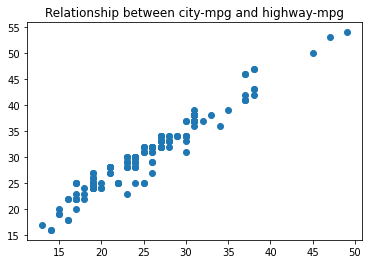

In [39]:
plt.scatter(auto['city-mpg'], auto['highway-mpg'])
plt.title("Relationship between city-mpg and highway-mpg")

There seems to be a linear positive correllation between the city-mpg and highway-mpg. 

**NOTE: Correllation does not necessarily mean Causation**

What is the relationship between make, city-mpg and highway-mpg?

<AxesSubplot:title={'center':'Relationship between make and city-mpg'}, xlabel='city-mpg', ylabel='make'>

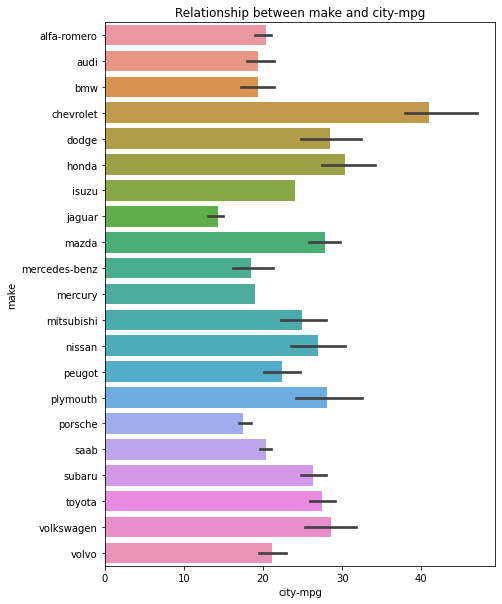

In [40]:
plt.figure(figsize=(7,10))
plt.title("Relationship between make and city-mpg")
sns.barplot(x='city-mpg', y='make', data=auto)

<AxesSubplot:title={'center':'Relationship between make and highway-mpg'}, xlabel='highway-mpg', ylabel='make'>

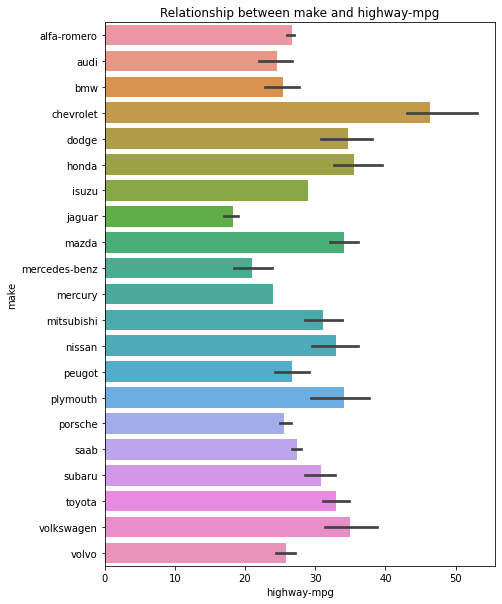

In [41]:
plt.figure(figsize=(7,10))
plt.title("Relationship between make and highway-mpg")
sns.barplot(x='highway-mpg', y='make', data=auto)

What's the relationship between 'fuel-type' and 'highway-mpg'?

<BarContainer object of 193 artists>

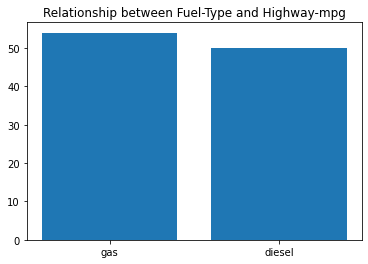

In [42]:
plt.title("Relationship between Fuel-Type and Highway-mpg")
plt.bar(auto['fuel-type'], auto['highway-mpg'])

Cars that run on gas cover more miles than those that run on diesel as show in the graph above

### Trends & Patterns noticed from the analysis

The following trends were identified from the analyses and visualizations above:

* Generally, across all the makes, cars that use gas as fuel cost more than those that use diesel, apart from the exception of mazda and volkswagen. Accross all the makes of cars, mercedes-benz that use gas is the most expensive with more than 45,000, closely followed by bmw at a little above 40,000 and followed by porsche at around 37,000.

* There's no significant relationship between make and price, other than the plot shows that the 3 highest expensive cars by price are: 'mercedes-benz', followed by 'bmw' and then 'porsche'

* Across all the makes of vehicles for sale at the company, cars with 'mpfi' fuel-system cost more than those with other types of fuel-system. It can be inferred that 'mpfi' fuel-system is of higher quality than the other types and adds highest value to cars more and makes their prices more competitive in the market.

*  It shows that cars that run on gas have higher horsepower than on diesel across the different types of fuel-system, apart from 'idi' fuel-system.

* There's a direct relationship between horsepower and prices with the two variables increasing from left to right and this is the same among the different types of drive-wheels (rwd, fwd, and 4wd)

* There seems to be a positive correlation between the body-area and price but, correlation does not mean causation. Further analysis revealed that there is no direct relationship between body-area and price of the car as 'sedan' with the biggest body-area doesn't have the highest price figure. This is obvious from the irregular line patterns as seen on the plot.

* Across all the makes of cars, cars that the engines are located at the front have bigger engine sizes and are more than cars that their engines are located at the rear.

* Across all the makes of the cars, there's a negative correlation between the compression ratio and engine location (from front to rear). The compression ratio is high when the engine location is in front and it is low when the engine location is at the rear. Please note that correllation does not mean causation.

* It seems there's no positive correlation between the number of cylinders in the makes of the cars and the level of compression ratio. Cars with 5 cylinders have the highest level of compression ratio of about 13, followed by those with 10 cylinders with compression ratio of about 11.6, and with the highest third with cars that have four cylinders with compression ratio of 10.0

* There are a total of 22 different makes of vehicles in the warehouse during the period of analysis.

* Based on the above, the 5 highest makes based on their numbers at the warehouse are: **Toyota, Nissan, Mazda, Mitsubishi, and Honda**. We can assume these figures are based on the market demands at this particular time, in order to lower the warehouse fees, and to balance the demand-supply forces.

* There seems to be a linear positive correllation between the city-mpg and highway-mpg. Correllation does not necessarily mean Causation.

* Cars that run on gas cover more miles than those that run on diesel as show in the graph above


### Recommendations

From the above analyses conducted on the dataset and the insights derived, the following recommendations are hereby made to the stakeholders:

* The business invests more in makes of cars that use gas as fuel-type due to their versatility in terms of horsepower, miles covering (highway-mpg), and competitve prices

* The business invests in cars that have mpfi fuel system built in them because of their highest quality in the market. Customers will definitely look out for this feature in their choice of cars.

* Based on what is obtainable in inventory, it is recommended that the business maintains the stock levels of the highest volumes of these makes of cars **(Toyota, Nissan, Mazda, Mitsubishi, and Honda)** and should be the types that run on gas and have mpfi fuel system. Invventory should be based on the forces of demand and supply abd overstocking should be prevented to maintain low warehouse costs.

* In conclusion, We will still need to get more information like costing data, sales data, etc. from our source in order to answer some of the questions by the stakeholders. It is therefore recommended that we get back to the drawing board and meet with the stakeholders to be able to get to explore further the company's data over a period of time to get more insights to answer other questions being asked.

